# Project journal

<!-- 

### Long term tasks
 * Set a date for a paper manuscript
 * think of 3 plots that should be in the paper
 * layout the paper headline wise
 * should the PGW simulation be in the first paper?
  -->

## Weekly summaries

<!-- In the last Panel Meeting (August 2023) we decided to revive this and (for now) give it a more problem oriented structure, like this:
1. problem
2. possible reasons
3. what I am going to check (and why) -->

### KW 50

### KW 49

The boundary conditions do not fit what is happening inside the domain. This can be seen in this snap shot at a longitudinal cross section

![](03_adiabatic_warming/img/fig_lon_crosssection_boundaries.png)


![](03_adiabatic_warming/img/fig_compare_boundary_condition_profiles.png)

Hauke Schulz did work with a test domain at some point. It has a structure similar to the *real* runs, but works on somewhat smaller domains. I got the setup to run and the workload is much smaller, resulting in a roughly 13 times higher throughput.

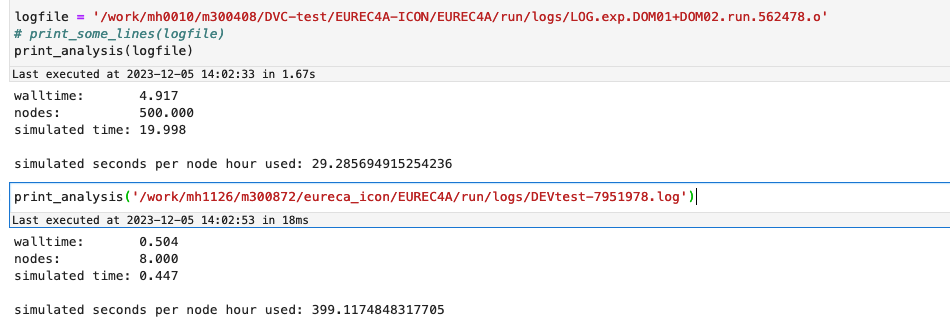

### KW 46


#### High surface fluxes

Fluxes of latent and sensible heat are high in our warming simulations. One could expect a rise in surface fluxes with a rise in saturation specific humidity. This rise would be around 25 percent for a 4 degree warming. Instead we see an increase in fluxes of roughly 100 percent. We wanted to answer two questions:
 
 - Can we exclude an output error?
 - And why are the fluxes so high?

An **output error can be excluded** based on two lines of evidence: output is consistent over different types (meteogram and surface fields) and the surface fluxes covary with the variables that should form the basis for their calculation.

The variables that seems to cause the high fluxes is the gradient at the surface (e.g. the relative humidity at the surface). Although we tried deliberately keep the relative humidity equal to the control simulation there seems to be a discrepancy.


<!-- ![](03_adiabatic_warming/img/fig_histogram_variable_REL_HUM10M.png) -->


![](03_adiabatic_warming/img/fig_relhum_profiles.png)

More details in the [notebook on surface fluxes](https://gitlab.gwdg.de/hernan.campos/warm_eurec4a/-/blob/main/03_adiabatic_warming/16_surface_fluxes.ipynb?ref_type=heads)




#### Computational efficiency

Last month we tried to derive a new estimate for the resources we would need for a production run. At the end we arrived at an estimate of at least 150000 node hours for one full production run. [This estimate](https://gitlab.gwdg.de/hernan.campos/warm_eurec4a/-/blob/main/02_proposals-reports-abstracts/07_CLICCS-proposal_V2/01_estimate_node_hours.ipynb?ref_type=heads) was built on shaky ground, because the assumption that I was only using the coarsest domain DOM01 was wrong and because I did not know which logfiles from the production of the control run to look at. 

I [redid the analysis](https://gitlab.gwdg.de/hernan.campos/warm_eurec4a/-/blob/main/03_adiabatic_warming/17_computational_efficiency.ipynb?ref_type=heads)and arrived to the conclusion that one node hour yields us roughly 30 seconds of simulation when using both domains (DOM01+DOM02). This holds for both the control and the warming setups and it means we can achieve one simulated day per day with 120 nodes. A full 40 day run would cost roughly **115200 node hours**.

<!-- [estimate of node hours](https://gitlab.gwdg.de/hernan.campos/warm_eurec4a/-/blob/main/02_proposals-reports-abstracts/07_CLICCS-proposal_V2/01_estimate_node_hours.ipynb) -->

### KW 39

new from the surface fluxes

computing proposal
[estimate of node hours](https://gitlab.gwdg.de/hernan.campos/warm_eurec4a/-/blob/main/02_proposals-reports-abstracts/07_CLICCS-proposal_V2/01_estimate_node_hours.ipynb)

### KW 38

#### Surface Fluxes

##### Problem
Surface fluxes are unusually high (see KW 35), even when compared to simulations with similarl forcing (+4 kelvin surface warming).

##### Possible causes
If fluxes are really higher, their calculation and their difference should be comprehensible. Another possibility would be that this is a output problem (a bug) 

##### How to investigate
I looked at surface fluxes in the NTAS meteogram. The meteogram output is somewhat independent. The fluxes in the meteogram agreeing with the 2D data give us some confidence that we are not dealing with an output bug.
In the following plots we compare the timeseries of latent heat fluxes with the variables that the flux calculations are based upon, following this equation (Yu, 2009):

\begin{equation}
Q_{LH} = \rho \cdot L_e \cdot c_e \cdot W \cdot (q_s - q_a)
\end{equation}

We see that the variability of the latent heat fluxes seems to correlate to variablity in the humidity gradient (`RH_10M`) and wind speed (`UV10M`). But these two variables move in the same range if the warming with the control run (we trust the values in the control run). The different magnitude seems to be caused by the latent heat of vaporisation, which in turn is based on a formula from Yu (2009) that uses surface temperatures.

\begin{equation}
L_e = (2.501 - 0.00237 * T_s) * 1e06
\end{equation}

![](03_adiabatic_warming/img/fig_flux-timeseries_control_latent.png)

![](03_adiabatic_warming/img/fig_flux-timeseries_warming_latent.png)

Latent heat of evaporisation plays no role in the sensible heat fluxes, But here the range of the gradient term (`T_surface - T_10m`) is doubled, which might explain the increased range of the sensible heat surface fluxes.

\begin{equation}
Q_{SH} = \rho \cdot c_p \cdot c_h \cdot W \cdot (T_s - T_a)
\end{equation}

![](03_adiabatic_warming/img/fig_flux-timeseries_control_sensible.png)

![](03_adiabatic_warming/img/fig_flux-timeseries_warming_sensible.png)


##### Further checks

- The time series does not show the extreme values (-1400 W/m^2). A spatial view (map plot) might help
- histogram of meteogram output, what is in the aquaplanet histogram (time and space?)?
- The above is based on a canonical surface flux formula as found in the literature. I could instead check the actual formula implemented in ICON.



### KW 37

##### Fluxes
![](03_adiabatic_warming/img/fig_multivar_timeseries_LHFL2.png)

##### Sanity check boundary conditions

This should be automated.

##### SMOC analysis


### KW 36

This week has been dominated by the annual IMPRS retreat, where I talked about model physics ([presentation pdf](./02_proposals-reports-abstracts/05_IMPRSretreat/202308_IMPRSretreat.pdf)).

### KW 35

##### Problem
Surface fluxes are much higher, than expected from the applied temperature forcing

![](03_adiabatic_warming/img/fig_hfls_histogram_aquaplanet.png)
![](03_adiabatic_warming/img/fig_hfls_histogram_LES.png)

##### Reasons
If we take this formula $Q_{LH} = \rho \cdot L_e \cdot c_e \cdot W \cdot (q_s - q_a)$ from Yu (2019), then surface fluxes are calculated from: surface temperature (via Latent heat of evaporation $L_e$) surface winds ($W$), near surface air density ($\rho$) and relative humidity ($ (q_s - q_a)$). Any of these is a suspect for having unreasonable values. 

Another possibility is, that the output is faulty. Or put in another way: maybe the way surface fluxes are diagnosed does not behave well with the much higher surface temperatures.

##### Approach
Although the turbulent exchange coefficients for latent heat ($c_e$) is unknown (to me), we should be able to estimate it from the other variables and the latent heat flux ($Q_{LH}$) as given in the output. As the surface fluxes in the control run are convincing, we could the output of the control run to estimate $c_e$. This estimated $c_e$ can then be used to recalculate expected surface fluxes in the output of the warming run.

A single column should be enough and thus we can use meteogram data to look into this:

![](03_adiabatic_warming/img/fig_multivar_timeseries_LHFL.png)


### KW13

TODO:
- [ ] a run with dt_conv == surface_variable_output_frequency

This longer test run with `dt_conv = 180` seems to confirm that using an appropriate `dt_conv` will solve the output problem. In this test run `dt_rad`, `dt_sso` and `dt_gwd` were not set (They should be). 

![](00_preliminary/img/dt_conv180_dt_rad_disabled.png)

### KW12

I spent most of the week preparing for the AES seminar. This included reading and making/adapting plots.

The most important papers for process understanding were:
 - Vogel et al., 2022, [*Strong cloud–circulation coupling explains weak trade cumulus feedback*](https://www.nature.com/articles/s41586-022-05364-y)
 - Vial et al., 2018, [*Mechanisms and Model Diversity of Trade-Wind Shallow Cumulus Cloud Feedbacks: A Review*](https://link.springer.com/chapter/10.1007/978-3-319-77273-8_8)

This figure is meant to highlight the advantage of the eurec4a simulation setup: variability.

<figure>
  <img src="03_adiabatic_warming/img/latbc_variance_withdelta.png" alt="lateral boundary conditions" style="width:70%">
    <figcaption>Recreation of above Figure 1 from Radtke et al. (2020) with lateral boundary conditions of EUREC4A ICON-LES setup. The solid blue line represents the median, the light blue area is the interquartile range.</figcaption>
</figure> 

In comparison to earlier LES studies:

<figure>
  <img src="https://acp.copernicus.org/articles/21/3275/2021/acp-21-3275-2021-f01-web.png" alt="Figure 1 from Radkte et al. (2020)" style="width:60%">
    <figcaption>Figure 1 from Radkte et al. (2020): Initial profiles of (a) potential temperature θ, (b) specific humidity qv, (c) relative humidity (RH), (d–e) horizontal winds u and v for the control (solid line) and the perturbed (vertically uniform warming, dashed line; warming following a moist adiabat, dotted line) climate states.</figcaption>
</figure> 

The slides for the talk are [part of this repository](02_proposals-reports-abstracts/04_AES-seminar/aes_2023_offline.pdf).

Some of the feedback:

- Ulrike Neumeier was worried about the model top being to low for a proper representation of high clouds. These are not our main interest, but this matter should not be forgotten during anaylis. Jule mentioned something about an longwave radiation threshold she used for filtering her data. Is that related?
- Ann Kristin raised the question wether my (supposedly pure) thermodynamic forcing could induce subsidence by enhanced radiative cooling. Can this happen without prescribed surface divergence? Is mass conserved at the LES boundaries? How does subsidence forcing work with the lateral boundaries? 
- I did not talk much about mesoscale patterns during my seminar, but many questions hinted into this direction. Mesoscale convection was the main driver mechanism Vogel and colleagues (2022) presented, Raphaela asked about whether I will look into this, and Jule told me that many people were interested in this, too. Alessandro Savazzi also asked about these patterns, at the same time hinted at a talk Pouriya Alinaghi (TU Delft, *Mesoscale Organization of Trade Cumulus Cloud Fields Buffers The Net Radiative Effect of Microphysical Variability*) that supposedly gives further proof for no qualitative link of mesoscale patterns and cloud radiative effect (other than cloud amount).


### KW11

### Abstract for CFMIP/GASS meeting

Shallow cumulus clouds cover large parts of the tropical ocean and contribute significantly to earths short wave feedback.
Yet with their typical size below 1 km they are far beyond what General Circulation Models (GCMs) that are used for
climate predictions are able to resolve. This makes them a major contributor to the total uncertainty in equilibrium climate
sensitivity. Recent advancements in computational resources have made it possible to perform large-domain Large Eddy
Simulations (LES) with realistic boundary conditions, offering the potential to better constrain the shallow cumulus cloud
feedback.
We use the ICON LES setup that was created to accompany the EUREC4A field campaign. It implements reanalysis
based, realistic boundary conditions and has proven to accurately simulate shallow cumulus cloud cover and its meso scale
organisation during the EUREC4A time frame. In this study, we introduced global warming into the experiment setup via
its boundary conditions.
We compared two warming experiments: a simple experiment that added moist adiabatic warming to the sea surface and
air temperature while keeping relative humidity constant, and a complex experiment that used multi-variable deltas derived
from the comparison of two GCM runs (Pseudo global warming). We analyzed the effect of these experiment setups on the
cloud radiative effect and its implications for the behavior of shallow cumulus clouds in a warming world.

### MPIM website

Text for the [MPIM website](https://mpimet.mpg.de/en/staff/atmosphere/hernan-campos):

How will clouds behave in a warming world and how will this change feed back to the warming process? This question has occupied scientists for many years. It is especially hard to answer for the smallest clouds, shallow cumulus, as they need high resolutions to be properly represented in climate models. In my PhD project I try to leverage the capabilities of ICON-LES to look at the behaviour of these clouds under global warming conditions in sub-kilometer resolution. I work with Bjorn Stevens and Ann Kristin Naumann in the group Drivers of Tropical Convection (DTC).


<!-- 
![image.png](attachment:878e4293-a2f7-4b49-8dd7-d72bfbbac141.png) 
-->


### KW08
![](00_preliminary/img/mean_timeseris_allvars.png)
![](00_preliminary/img/tqvtqitqc_timeseries_uhf-rerun.png)


`/work/mh1126/m300872/icon_haukestate/src/atm_phy_les/mo_interface_les.f90`

```fortran
inwp_convection = 0,0,0
[...]
inwp_turb       = 5,5,5
```

In `/work/mh1126/m300872/icon_haukestate/src/configure_model/mo_atm_phy_nwp_config.f90` wird LES angeschaltet, wenn: `IF(ANY( (/ismag,iprog/)  == atm_phy_nwp_config(jg)%inwp_turb ) )THEN` und 
`/work/mh1126/m300872/icon_haukestate/src/shared/mo_impl_constants.f90`:  `INTEGER, PARAMETER :: ismag   =  5`

wenn dann `ismag == inwp_turb` wird `is_les_phy` auf `.TRUE.` in `mo_atm_phy_nwp_config.f90` gesetzt

`atm_phy_nwp_config(jg)%is_les_phy = .TRUE.`

Dann wird in `mo_nh_stepping.f90` das les_phy_interface aufgerufen
was dann dieses ist: `/mo_interface_les.f90`
und da gibt es keine Konvektion


`dt_conv` wird in `mo_nwp_phy_nml.f90` gesetzt

Anurag Dipankar (ETH) hat den LES Code geschrieben (anurag.dipankar@c2sm.ethz.ch).

Ausprobieren:
- `dt_conv`, `dt_sso` und `dt_gwd` komplett weg lassen
- nicht diagnostische variablen ausschreiben und mit diagnostischen vergleichen (e.g. `tqv` statt `tqv_dia`)
  Diese sollten keine Ausreißer haben. Die nicht diagnostischen Varianten berücksichtigen keine sub grid scale processes und sind daher minimal ungenauer. Wie stark die Abweichung ist muss festgestellt werden. Eventuell sind die beiden Varianten austauschbar.
 

### KW06

![](00_preliminary/img/clct_diff.gif)
![](00_preliminary/img/sob_t_diff.gif)
![](00_preliminary/img/tqc_dia_diff.gif)


### KW05

![](00_preliminary/img/mean_timeseris_allvars.png)    
![](00_preliminary/img/meteogram_bco_hovmoeller_diff.png)

### KW03

I ran the simulation with a 4 degree warming following a moist adiabat. The domain seems to cool down during spin up.

![](./03_adiabatic_warming/img/t2m_timeseries_rerun_warming.png)

This is also visible in the meteogram. The uppermost layers are warming compared to the initial state, because radiative effects were neglected in the warming approach:

![](./03_adiabatic_warming/img/meteogram_warming_vs_control.png)

This causes water to condense and increases cloud cover by 20 percent (of the whole domain).

![](./03_adiabatic_warming/img/clct_compare.gif)

In [4]:
import datetime

def get_current_calendar_week():
    """
    Returns:
        int: The current calendar week number (1 to 52/53).

    Note:
        - Calendar weeks are numbered from 1 to 52 or 53, depending on the year.
        - The function uses the ISO week date system, where week 1 of a year is the week
          that contains at least four days of that year.
        - The week number is based on the current system date and may vary depending on
          your locale's week-start day (e.g., Monday or Sunday).
    """
    return datetime.datetime.now().isocalendar()[1]

get_current_calendar_week()

39